In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose
import math 


In [74]:
df = pd.read_excel("Data Story.xlsx")


In [75]:
df['Time'] = pd.to_datetime(df['Time'])

In [76]:
df

,Time,"ETH / Price, USD","Log ETH Price, USD",Daily Log Return,Daily Variance
0,2015-08-08,1.199990,0.182313,0.000000,0.000000
1,2015-08-09,1.199990,0.182313,0.000000,0.000000
2,2015-08-10,1.199990,0.182313,0.000000,0.000000
3,2015-08-11,0.990000,-0.010050,-0.192364,0.037004
4,2015-08-12,1.288000,0.253091,0.263141,0.069243
...,...,...,...,...,...
2992,2023-10-17,1565.294394,7.355829,-0.022551,0.000509
2993,2023-10-18,1563.409309,7.354624,-0.001205,0.000001
2994,2023-10-19,1566.428419,7.356553,0.001929,0.000004
2995,2023-10-20,1605.573863,7.381237,0.024683,0.000609


In [26]:
def calculate_annualised_volatility(year, df):
    year_data = df[df['Time'].dt.year == year]

    # Calculating annualised volatility
    trading_days = len(year_data)
    daily_volatility = year_data['Daily Log Return'].std()
    annualised_volatility = daily_volatility * np.sqrt(trading_days)

    return annualised_volatility

In [27]:
years = range(2015,2024)
annual_volatility = {}

for year in years:
    if year == 2015:
        annual_volatility[year] = calculate_annualised_volatility(year, df[(df['Time'] >= '2015-08-08') & (df['Time'] <= '2015-12-31')])
    elif year == 2023:
        annual_volatility[year] = calculate_annualised_volatility(year, df[(df['Time'] >= '2023-01-01') & (df['Time'] <= '2023-10-21')])
    else:
        annual_volatility[year] = calculate_annualised_volatility(year, df[df['Time'].dt.year == year])

for year, volatility in annual_volatility.items():
    print(f"Year {year}: Annualised Volatility = {volatility * 100:.4f}%")

Year 2015: Annualised Volatility = 121.6596%
Year 2016: Annualised Volatility = 131.7500%
Year 2017: Annualised Volatility = 135.7864%
Year 2018: Annualised Volatility = 109.5273%
Year 2019: Annualised Volatility = 81.9489%
Year 2020: Annualised Volatility = 102.8675%
Year 2021: Annualised Volatility = 104.6748%
Year 2022: Annualised Volatility = 87.6724%
Year 2023: Annualised Volatility = 40.3660%


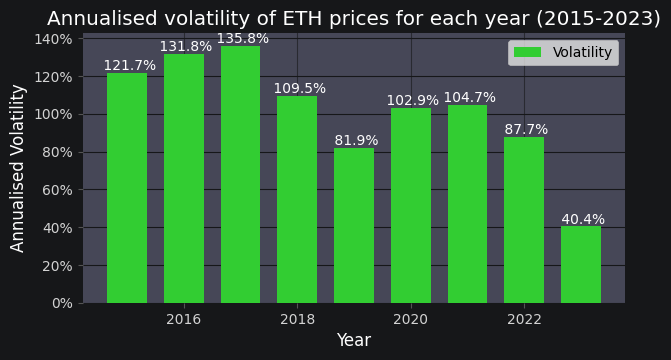

In [161]:

df_bar = pd.DataFrame(list(annual_volatility.items()), columns=['years', 'annual_volatility'])

df_bar= df_bar.sort_values(by='years')

df_bar['annual_volatility'] = df_bar['annual_volatility'] * 100

back_color = (22/255, 23/255, 25/255)
plt.figure(figsize=(7, 3.5), facecolor = back_color)

color = (0/255, 157/255, 196/255)

bars = plt.bar(df_bar['years'], df_bar['annual_volatility'], color = 'limegreen', width = 0.7, label = 'Volatility')

plt.grid(True, color = back_color)
plt.title('Annualised volatility of ETH prices for each year (2015-2023)', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Annualised Volatility', color='white')
plt.grid(True, axis='x', alpha=0.6, color = back_color)

plt.xticks(color='lightgrey')
plt.yticks(color='lightgrey')

def percentage_formatter(x, pos):
    return f'{x:.0f}%'

fore_color = (70/255, 71/255, 87/255)
plt.gca().set_facecolor(fore_color)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for bar, value in zip(bars, df_bar['annual_volatility']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value: .1f}%', ha='center', va='bottom', color = 'white')

plt.legend()

plt.show()

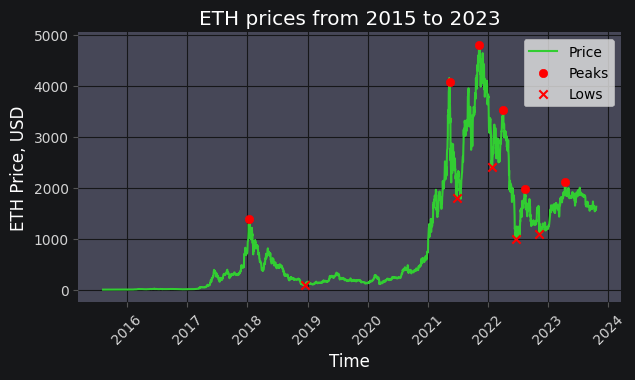

In [153]:
peaks_x = [
    1380.14454, 4086.709764,
    4811.156463, 3525.405897, 
    1981.237541, 2119.367382
 ]
peaks_y = ['2018-01-13', '2021-05-14', 
           '2021-11-08', '2022-04-04', 
           '2022-08-13', '2023-04-16'
]

lows_x = [
    82.83019024, 1801.976275, 
    2412.62447, 992.7900973, 
    1092.99871
 ]
lows_y = ['2018-12-15', '2021-06-26', 
          '2022-01-27','2022-06-18', 
          '2022-11-09'
]
marker_color = 'red'
marker_peak = 'o'
marker_low = 'x'


back_color = (22/255, 23/255, 25/255)
plt.figure(figsize=(7, 3.5), facecolor = back_color)

color = (0/255, 157/255, 196/255)

plt.plot(df['Time'], df['ETH / Price, USD'], color = 'limegreen', label = 'Price')


peaks_y = [
    1380.14454, 4086.709764,
    4811.156463, 3525.405897, 
    1981.237541, 2119.367382
 ]
peaks_x = ['2018-01-13', '2021-05-14', 
           '2021-11-08', '2022-04-04', 
           '2022-08-13', '2023-04-16'
]

lows_y = [
    82.83019024, 1801.976275, 
    2412.62447, 992.7900973, 
    1092.99871
 ]
lows_x = ['2018-12-15', '2021-06-26', 
          '2022-01-27','2022-06-18', 
          '2022-11-09'
]
marker_color = 'red'
marker_peak = 'o'
marker_low = 'x'
plt.scatter(peaks_x, peaks_y, color=marker_color, marker=marker_peak, label = 'Peaks', zorder = 2)
plt.scatter(lows_x, lows_y, color=marker_color, marker=marker_low, label = 'Lows', zorder = 2)

plt.grid(True, color = back_color)
plt.title('ETH prices from 2015 to 2023', color='white')
plt.xlabel('Time', color='white')
plt.ylabel('ETH Price, USD', color='white')

plt.xticks(rotation = 45, color='lightgrey')
plt.yticks(color='lightgrey')

fore_color = (70/255, 71/255, 87/255)
plt.gca().set_facecolor(fore_color)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend()

plt.show()

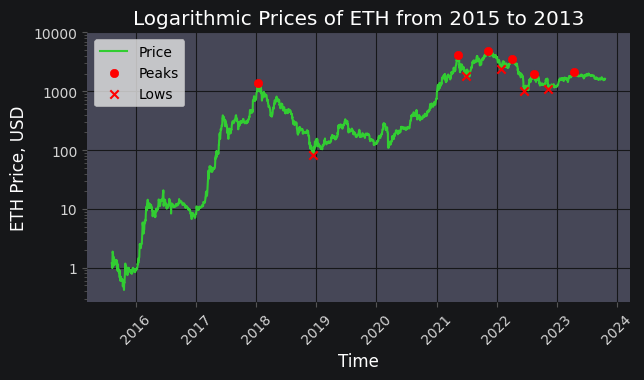

In [151]:
back_color = (22/255, 23/255, 25/255)
plt.figure(figsize=(7, 3.5), facecolor = back_color)

eth_price_from_log = df['Log ETH Price, USD'].apply(lambda x: math.e**x)

color = (0/255, 157/255, 196/255)

plt.semilogy(df['Time'], eth_price_from_log, color = 'limegreen', label = 'Price')

peaks_y = [
    1380.14454, 4086.709764,
    4811.156463, 3525.405897, 
    1981.237541, 2119.367382
 ]
peaks_x = ['2018-01-13', '2021-05-14', 
           '2021-11-08', '2022-04-04', 
           '2022-08-13', '2023-04-16'
]

lows_y = [
    82.83019024, 1801.976275, 
    2412.62447, 992.7900973, 
    1092.99871
 ]
lows_x = ['2018-12-15', '2021-06-26', 
          '2022-01-27','2022-06-18', 
          '2022-11-09'
]

marker_color = 'red'
marker_peak = 'o'
marker_low = 'x'
plt.scatter(peaks_x, peaks_y, color=marker_color, marker=marker_peak, label = 'Peaks', zorder = 2)
plt.scatter(lows_x, lows_y, color=marker_color, marker=marker_low, label = 'Lows', zorder = 2)

plt.grid(True, color = back_color)
plt.title('Logarithmic Prices of ETH from 2015 to 2013', color='white')
plt.xlabel('Time', color='white')
plt.ylabel('ETH Price, USD', color='white')

y_ticks = [1, 10, 100, 1000, 10000]
y_tick_labels = [str(x) for x in y_ticks] 
plt.yticks(y_ticks, y_tick_labels, color='lightgrey')

plt.xticks(rotation = 45, color='lightgrey')


fore_color = (70/255, 71/255, 87/255)
plt.gca().set_facecolor(fore_color)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend()

plt.show()

In [31]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

df = df.resample('D').asfreq()

In [32]:
decomposition = seasonal_decompose(df['ETH / Price, USD'], model='multiplicative', period=365)

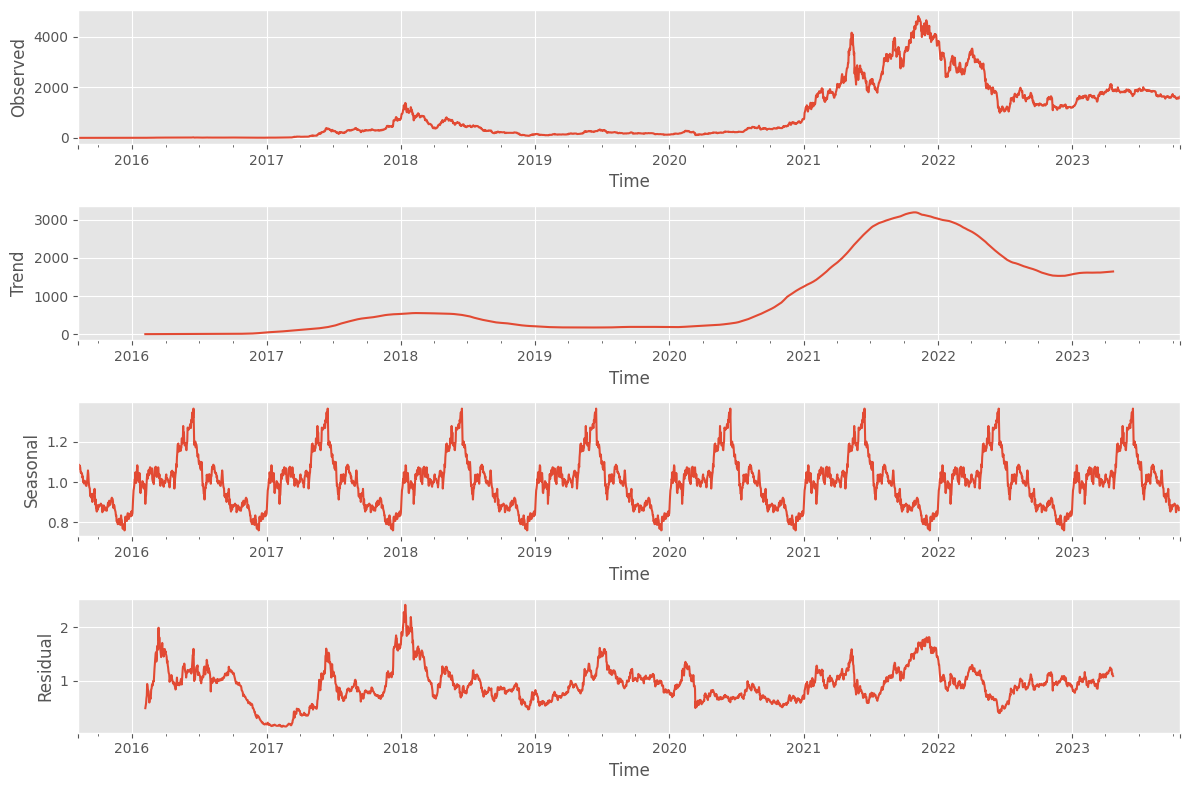

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()


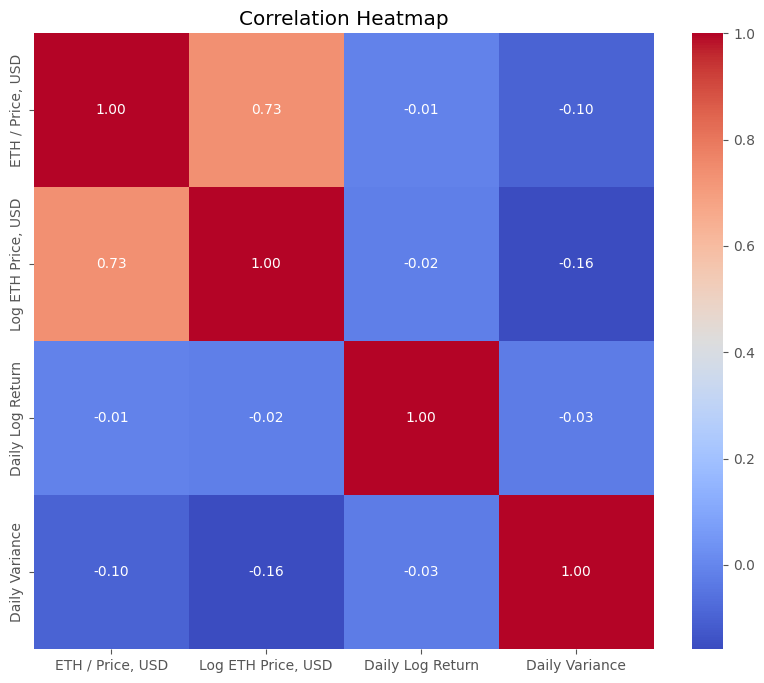

In [34]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()